In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
births = pd.read_csv('data/births.csv')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [6]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [8]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


Text(0, 0.5, 'total births per year')

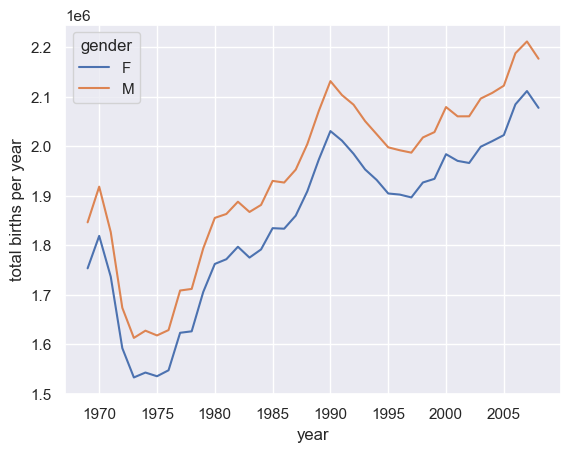

In [10]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [11]:
# Удаляем аномальные значения(неправильно набранные данные - 31 июня например или отсутсвующие значения - 99 июля например)
# Sigma-clipping (Сигма отсечения)
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # 0.74 межквартильный размах гауссовского распрд

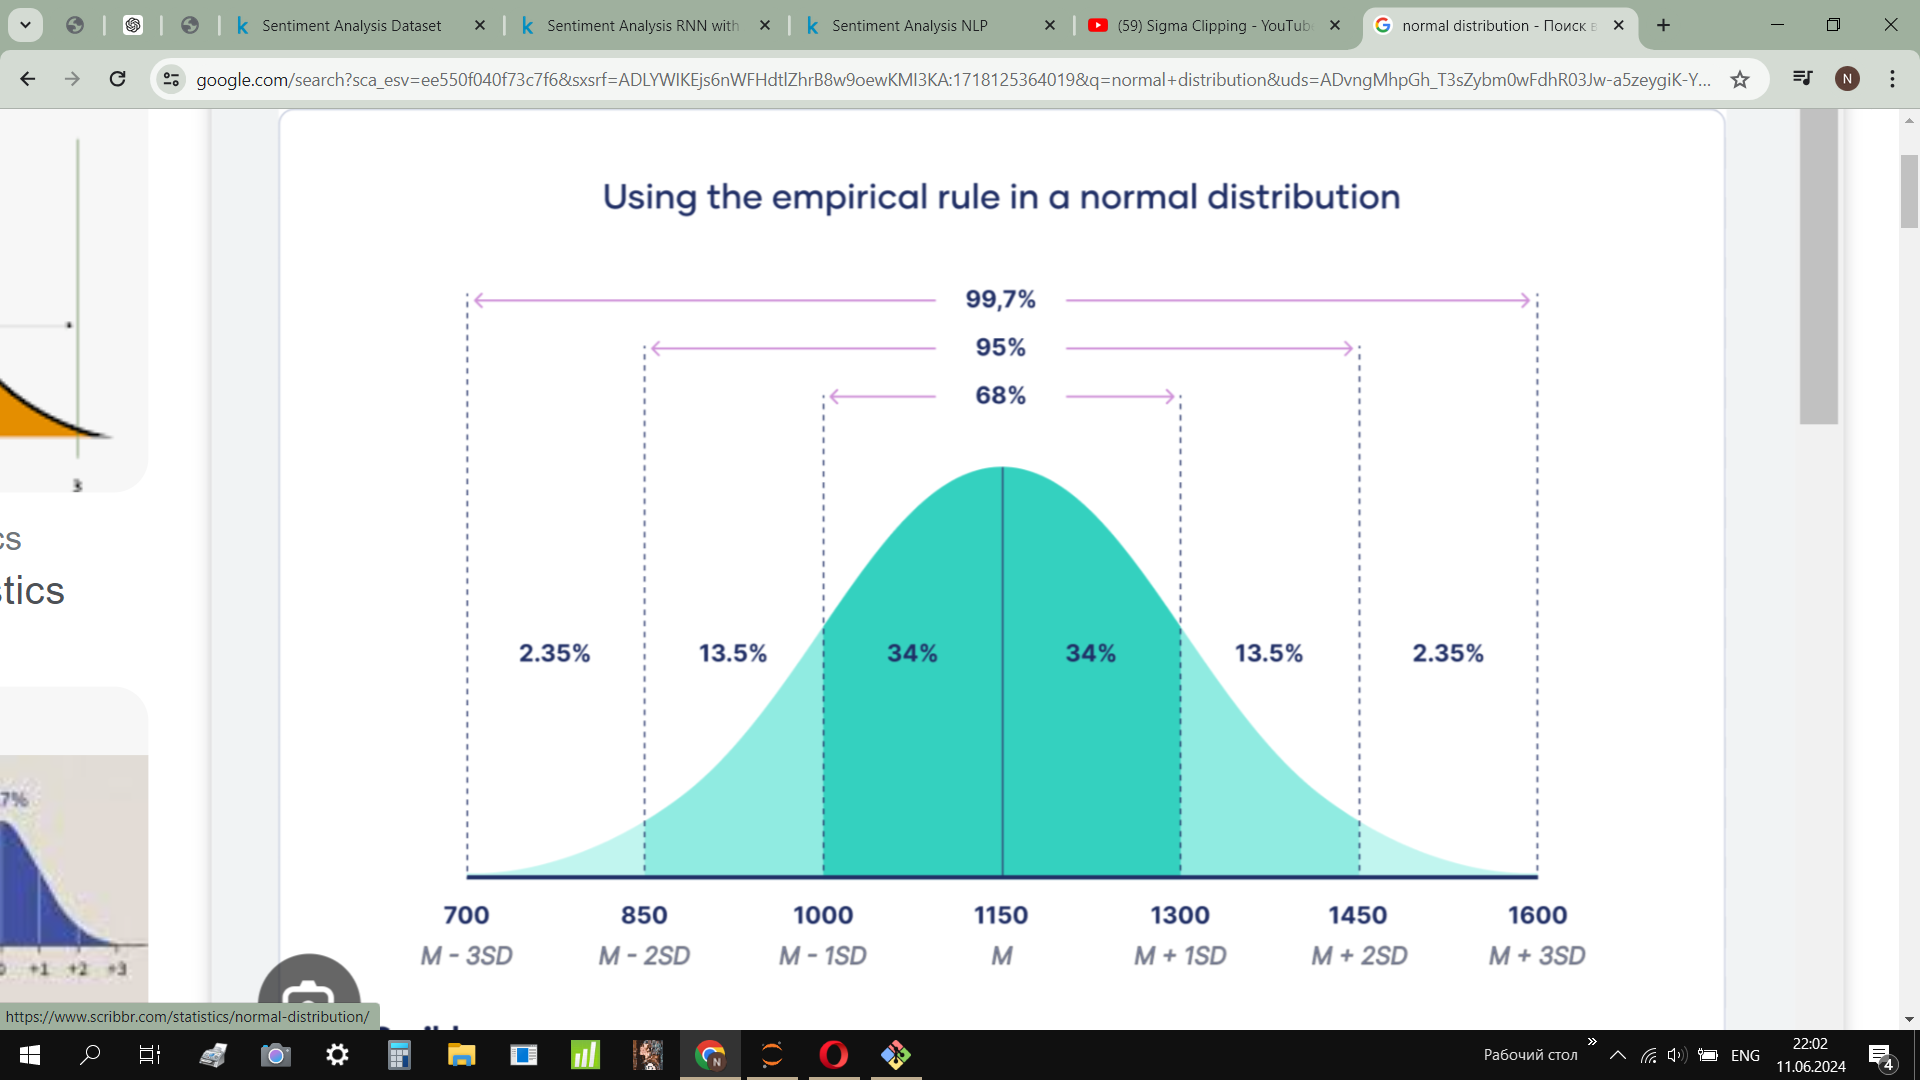

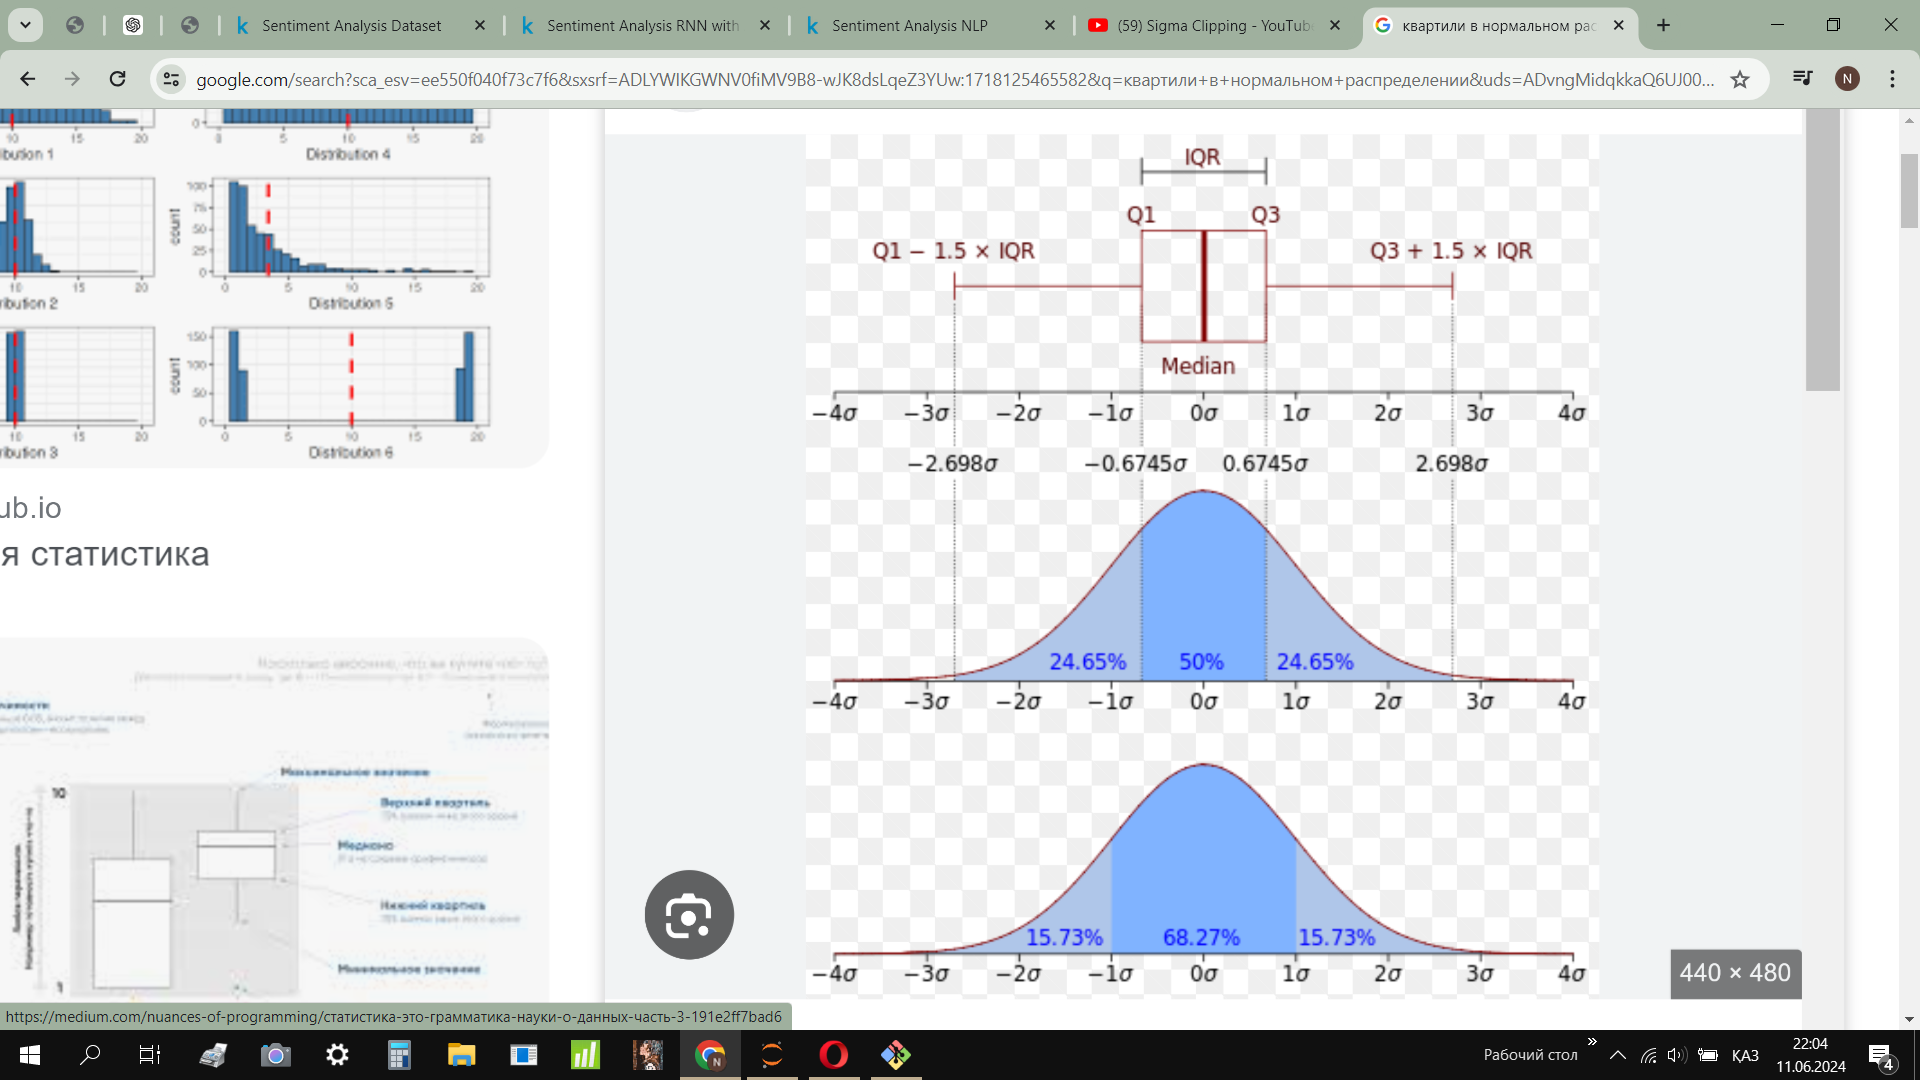

Sigma clipping (сигма-отсечение) - это статистический метод, используемый для удаления выбросов или аномальных значений из набора данных. Этот метод предполагает, что данные следуют нормальному (гауссовскому) распределению, и удаляет значения, которые находятся за пределами заданного количества стандартных отклонений (σ) от среднего значения (μ).

### Основные шаги и формулы

1. **Вычисление квартилей:**
   Квартиль - это значение, которое делит набор данных на четыре равные части.
   ```python
   quartiles = np.percentile(births['births'], [25, 50, 75])
   ```
   Здесь мы находим 25-й, 50-й и 75-й процентиль данных.

2. **Вычисление медианы (μ):**
   Медиана - это среднее значение данных.
   ```python
   mu = quartiles[1]
   ```
   Здесь медиана - это 50-й процентиль (середина данных).

3. **Вычисление межквартильного размаха (IQR):**
   Межквартильный размах - это разница между 75-м и 25-м процентилями.
   ```python
   IQR = quartiles[2] - quartiles[0]
   ```

4. **Оценка стандартного отклонения (σ):**
   Стандартное отклонение оценивается как \( \sigma = 0.74 \times IQR \).
   ```python
   sig = 0.74 * (quartiles[2] - quartiles[0])
   ```
   Коэффициент 0.74 используется, потому что для нормального распределения межквартильный размах составляет примерно 1.349 σ. Так что, $\sigma \approx \frac{IQR}{1.349} \approx 0.74 \times IQR$.

5. **Фильтрация данных с использованием сигма-отсечения:**
   Мы удаляем значения, которые находятся за пределами $\mu - 5\sigma \) и \( \mu + 5\sigma$.
   ```python
   filtered_births = births.query('births > @mu - 5 * @sig & births < @mu + 5 * @sig')
   ```

### Что такое @?

В выражениях Pandas query, символ `@` используется для доступа к переменным из текущей области видимости (например, из локальных переменных Python).

### Почему используются ±5σ?

Использование ±5σ позволяет удалить экстремальные выбросы, которые находятся далеко от среднего значения. В нормальном распределении:
- Примерно 68% данных находятся в пределах ±1σ от среднего значения.
- Примерно 95% данных находятся в пределах ±2σ от среднего значения.
- Примерно 99.7% данных находятся в пределах ±3σ от среднего значения.

Таким образом, ±5σ охватывает практически все данные и удаляет только самые экстремальные выбросы. 

### Пример

```python
import pandas as pd
import numpy as np

# Пример данных
data = {'births': [50, 60, 70, 80, 90, 100, 1000, 120, 110, 105]}
births = pd.DataFrame(data)

# Вычисление квартилей
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
IQR = quartiles[2] - quartiles[0]
sig = 0.74 * IQR

# Sigma clipping
filtered_births = births.query('births > @mu - 5 * @sig & births < @mu + 5 * @sig')
print(filtered_births)
```

В этом примере, если значение 1000 считается выбросом, оно будет удалено, так как оно значительно превышает пределы ±5σ.

The coefficient 0.74 is derived from the relationship between the interquartile range (IQR) and the standard deviation $\sigma$ for a normal distribution. Let's break down how this coefficient is calculated and why it is used.

### Interquartile Range (IQR) and Standard Deviation ($\sigma$)

For a normal distribution, the interquartile range (IQR) is the range between the 25th percentile (Q1) and the 75th percentile (Q3). The IQR covers the middle 50% of the data.

### Z-scores for Quartiles

In a normal distribution:
- The Z-score for the 25th percentile (Q1) is approximately \(-0.674\).
- The Z-score for the 75th percentile (Q3) is approximately \(+0.674\).

The Z-score is the number of standard deviations a data point is from the mean. So, the IQR in terms of Z-scores is:
\[ Q3 - Q1 = 0.674 - (-0.674) = 1.348 \]

### Relationship between IQR and \(\sigma\)

The IQR in terms of the standard deviation (\(\sigma\)) is:
\[ \text{IQR} = 1.348 \times \sigma \]

To express \(\sigma\) in terms of the IQR:
\[ \sigma = \frac{\text{IQR}}{1.348} \]

Since \( \frac{1}{1.348} \approx 0.74 \), we get:
\[ \sigma \approx 0.74 \times \text{IQR} \]

### Why Use 0.74?

The coefficient \(0.74\) is used because it provides a robust estimation of the standard deviation from the IQR for data that follows a normal distribution. This estimation is particularly useful when dealing with outliers, as the IQR is less sensitive to extreme values compared to the standard deviation.

### Applying Sigma Clipping

Using this relationship, sigma clipping involves filtering out data points that are a certain number of standard deviations away from the mean. In the provided code, \(\mu\) is the median, and \(\sigma\) is approximated using the IQR:
\[ \sigma \approx 0.74 \times \text{IQR} \]

The filtering criteria:
\[ \text{births} > \mu - 5\sigma \quad \text{and} \quad \text{births} < \mu + 5\sigma \]

This ensures that data points beyond 5 standard deviations from the median are considered outliers and are removed.

### Example Calculation

Here's a step-by-step example:

1. Calculate quartiles:
    ```python
    quartiles = np.percentile(births['births'], [25, 50, 75])
    Q1 = quartiles[0]
    Q2 = quartiles[1]  # Median
    Q3 = quartiles[2]
    ```

2. Calculate IQR:
    ```python
    IQR = Q3 - Q1
    ```

3. Estimate \(\sigma\):
    ```python
    sigma = 0.74 * IQR
    ```

4. Apply sigma clipping:
    ```python
    filtered_births = births.query('births > @Q2 - 5 * @sigma & births < @Q2 + 5 * @sigma')
    ```

This process helps to clean the dataset by removing extreme outliers while preserving the central tendency and variability of the data.

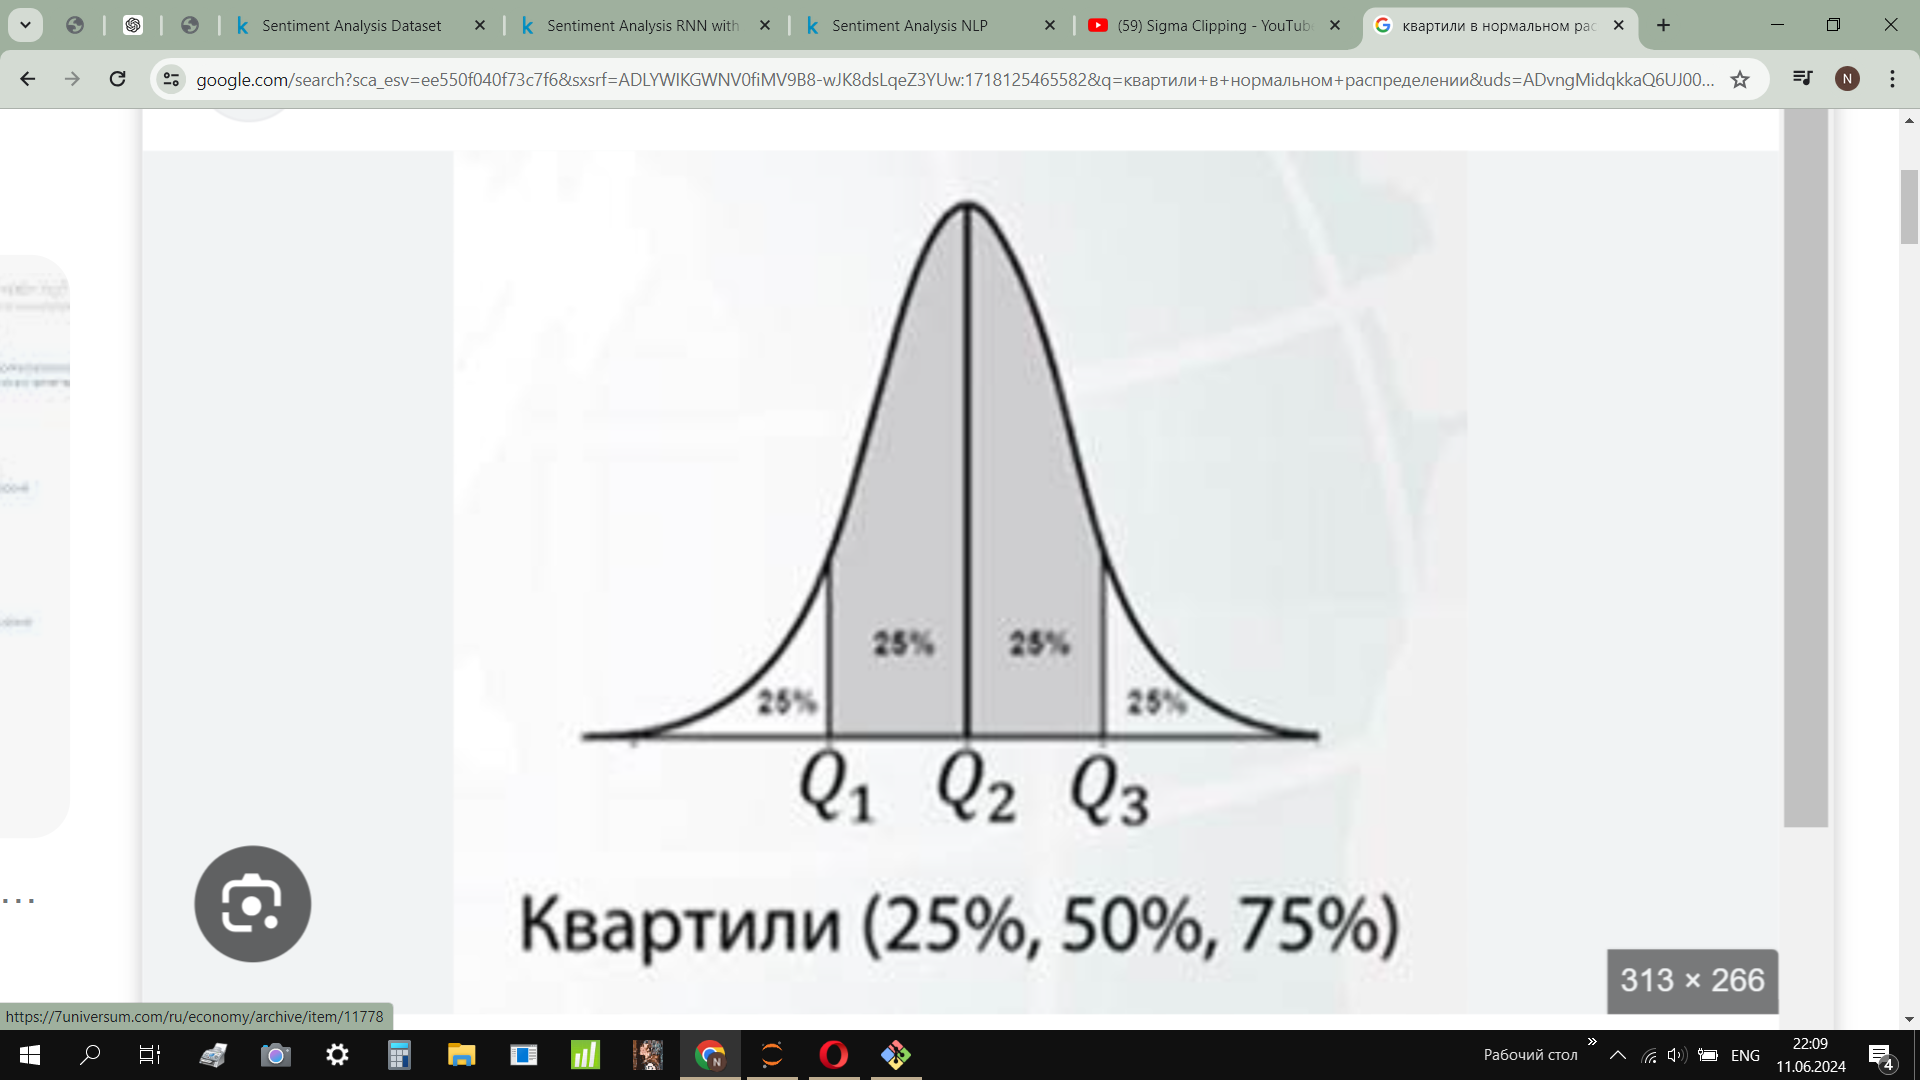

In [15]:
# Удаляем аномальные значения(неправильно набранные данные - 31 июня например или отсутсвующие значения - 99 июля например)
# Sigma-clipping (Сигма отсечения)
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) # 0.74 межквартильный размах гауссовского распрд

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [17]:
births['day'] = births['day'].astype(int)
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [21]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d') # 10000 * 2023 + 100 * 6 + 9 = 20230000 + 600 + 9 = 20230609
births['dayofweek'] = births.index.dayofweek
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


C:\Users\acer\AppData\Local\Temp\ipykernel_15236\670744342.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


Text(0, 0.5, 'mean birthes by day')

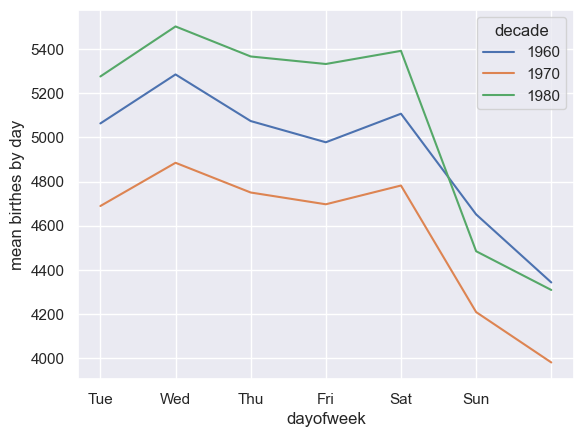

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean birthes by day')

In [23]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


In [ ]:
# Рождения в зависимости от дня года
births_by_date = bir